# Dataset Analysis

In [1]:
import os, sys 
sys.path.append("../")
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

## Creating a merged csv file of train data

Creating a merged train csv file in order to do some data analysis

In [38]:

#concatenate_data("../raw_train.csv")

Getting general information on the train data

In [4]:
get_information_on_data("../raw_train.csv")

------------------
File information ../raw_train.csv
File has 1086741 elements
There are 13844 unique Unnamed: 0 and here is an example : 
 4146 
 --------------
There are 17929 unique family_id and here is an example : 
 KH_dom-like 
 --------------
There are 1086741 unique sequence_name and here is an example : 
 F6B8B7_DESCC/16-176 
 --------------
There are 17929 unique family_accession and here is an example : 
 PF06999.12 
 --------------
There are 1086326 unique aligned_sequence and here is an example : 
 GLSTCKTIDMELVKRKRIEAIRGQILSKLRLA.SPPSQGEVPP............................GPLP.EAVLALYNSTRDRVAGESAEPEP..E........................................................................................PEADYYAKEVTRVLMV.ENTNKIYEKVQRT.....PHSIYMLFNTSELREAVPE...PVLLSRAELRLL.............................RLKL.......KAEQHVELYQKY..........SNNSWRYLSNRLL.....APSDTPEWLSFDVTGVVRQWLSHGGEVEGFRLSAHC........S....CD..SKDNTLQVDINGFSSSRRGDLATI................................HGMNRPFLLLM 
 --------------
There

Snippet of how the data looks like

In [5]:
df = open_data("../random_split/train/data-00000-of-00080")
df.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,GMC_oxred_C,A4WZS5_RHOS5/416-539,PF05199.13,PHPE.SRIRLST.RRDAHGMP.....IP.RIESRLGP............,PHPESRIRLSTRRDAHGMPIPRIESRLGPDAFARLRFMARTCRAIL...
1,DUF2887,K9QI92_9NOSO/3-203,PF11103.8,RDSIYYQIFKRFPALIFEL..VD.NRPPQAQNYRFESVEVKETAFR...,RDSIYYQIFKRFPALIFELVDNRPPQAQNYRFESVEVKETAFRIDG...
2,zf-IS66,Q92LC9_RHIME/32-75,PF13005.7,.TCCPDCGG.E..LRLVGED.AS....EILDMI.AAQMKVIEVARL...,TCCPDCGGELRLVGEDASEILDMIAAQMKVIEVARLKKSCRCCE
3,Asp_decarbox,X2GQZ4_9BACI/1-115,PF02261.16,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...,MLRMMMNSKIHRATVTEADLNYVGSITIDEDILDAVGMLPNEKVHI...
4,Filamin,A7SQM3_NEMVE/342-439,PF00630.19,TACPKQ.CTA....RGLG.............LK.AAPVT.QPT..R...,TACPKQCTARGLGLKAAPVTQPTRFVVILNDCHGQPLGRSEGELEV...


Generate a pandas profile 

In [6]:
generate_html_profiling("../raw_train.csv", 'your_report.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 609.37it/s]


For viewing data analysis prefer refer to the html generated panda Profiler.  
You can go to your terminal and open by executing ```open("your_report.html")``` or you can simply open it by double clicking on the file. 
Each datapoint has 5 columns ie :
- `family_id`
- `sequence_name`
- `family_accession`
- `aligned_sequence`
- `sequence` 

The data has `1086741` observations. 
Each observation is one unique protein that has its `sequence_name`, `sequence` and `aligned_sequence`.  
-  `sequence_name` is a unique identifier given to a protein sequence to allow for tracking of that sequence record.
- `sequence` is the protein amino acid sequence.  
- `aligned_sequence`takes into account the protein's multiple sequence alignment.  

Each observation (ie protein) refers to one class (ie `family_accession` or `family_id`).

We are dealing with a multiclassification problem with `17929` classes.  
Withing those classes we have `514` classes that are represented only once. For those classes we will have trouble on classifying them.  
To get a better idea of the number of datapoints for some classes there is the function `plot_` that plots the value counts of some classes.  
We have roughly `classes` that have less than `9` occurences in the trainset. 


In [42]:
def plot_(value_counter, m, M):
    plt.plot(value_counter.keys()[m: M], value_counter[m: M])
    plt.ylabel("Occurence")
    plt.xlabel("Family ids")
    plt.title("Value count of family_id in train data")
    plt.show()

In [43]:
df = open_data("../raw_train.csv")
a = df['family_accession'].value_counts()

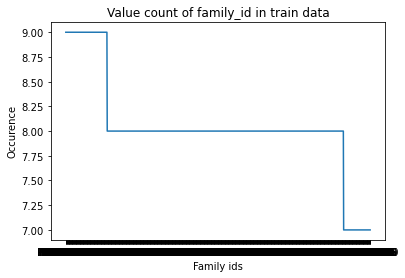

In [48]:
plot_(a, 13000,14000)